In [ ]:
from tensorflow.keras.layers import SimpleRNN

In [ ]:
"""
model.add(SimpleRNN(hidden_units,input_shape=(timesteps,input_dim))),model.add(SimpleRNN(hidden_units,input_length=M,input_dim=N))이런식으로 작성 둘이 같은 코드 timesteps=input_length
hidden_units=히든 상태의 크기(rnn출력)
timesteps=입력 시퀀스의 길이(input_length, 시점의 수)
input_dim=입력의 차원 (단어예측이면 코퍼스를 구성하는 단어 종류의 전체개수)

"""

'\nmodel.add(SimpleRNN(hidden_units,input_shape=(timesteps,input_dim))),model.add(SimpleRNN(hidden_units,input_length=M,input_dim=N))이런식으로 작성 둘이 같은 코드 timesteps=input_length\nhidden_units=히든 상태의 크기(rnn출력)\ntimesteps=입력 시퀀스의 길이(input_length, 시점의 수)\ninput_dim=입력의 차원 (단어예측이면 코퍼스를 구성하는 단어 종류의 전체개수)\n\n'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

In [ ]:
model = Sequential()

In [ ]:
model.add(SimpleRNN(3,input_shape=(2,10)))
#model.add(SimpleRNN(hidden_units,input_shape=(timesteps,input_dim)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model=Sequential()
model.add(SimpleRNN(3,batch_input_shape=(8,2,10)))
model.summary() #output shape 이 8이됨 hidden units=3 rnn셀에 입력층과 전시점의 결과가 입력되고 그 결과의 차원이 3, 각 셀의 출력데이터가 3차원

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
pip install -U finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=fdr.DataReader('005930','2015-01-01','2024-07-03')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,26799,26799,26540,26600,175499,0.002261
2015-01-05,26720,26720,26260,26660,202790,0.002256
2015-01-06,26300,26340,25760,25900,304710,-0.028507
2015-01-07,25880,26220,25640,26140,286455,0.009266
2015-01-08,26780,26780,26199,26280,289552,0.005356
...,...,...,...,...,...,...
2024-06-27,81300,81600,80500,81600,11739720,0.003690
2024-06-28,81900,81900,80800,81500,9455929,-0.001225
2024-07-01,81500,82100,81300,81800,11317202,0.003681


In [ ]:
df.shape

(2338, 6)

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Change
count,2338.000000,2338.000000,2338.000000,2338.000000,2.338000e+03,2338.000000
mean,52692.697177,53172.533362,52191.844739,52736.514115,1.035527e+07,0.000609
std,17876.029129,17992.708546,17721.618527,17735.885644,9.801984e+06,0.016023
min,0.000000,0.000000,0.000000,21340.000000,0.000000e+00,-0.080357
25%,41362.500000,41850.000000,41100.000000,41500.000000,2.653350e+05,-0.009313
50%,51200.000000,51770.000000,50630.000000,51270.000000,1.050909e+07,0.000000
75%,68000.000000,68700.000000,67575.000000,68000.000000,1.569868e+07,0.009265
max,90300.000000,96800.000000,89500.000000,91000.000000,9.030618e+07,0.104706


In [ ]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64

<Axes: xlabel='Date'>

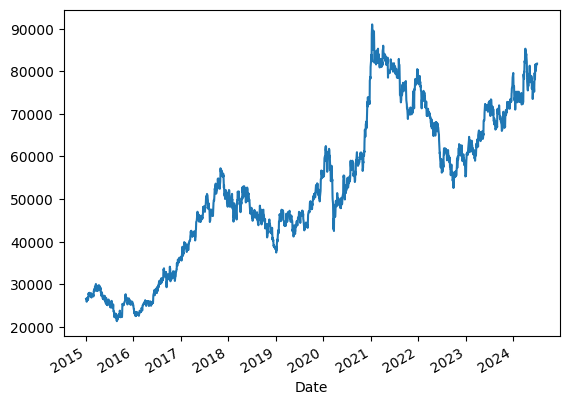

In [ ]:
df.Close.plot()

In [ ]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0) # axis=0 열단위로
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7) # 0으로 나누기 에러 방지위해 매우 작은값을 더해서 나눔

In [ ]:
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)

In [ ]:
dfx

,Open,High,Low,Volume,Close
Date,,,,,
2015-01-02,0.296777,0.276849,0.296536,0.001943,0.075510
2015-01-05,0.295903,0.276033,0.293408,0.002246,0.076371
2015-01-06,0.291251,0.272107,0.287821,0.003374,0.065461
2015-01-07,0.286600,0.270868,0.286480,0.003172,0.068906
2015-01-08,0.296567,0.276653,0.292726,0.003206,0.070916
...,...,...,...,...,...
2024-06-27,0.900332,0.842975,0.899441,0.129999,0.865059
2024-06-28,0.906977,0.846074,0.902793,0.104710,0.863623
2024-07-01,0.902547,0.848140,0.908380,0.125320,0.867930


In [ ]:
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
Date,,,,
2015-01-02,0.296777,0.276849,0.296536,0.001943
2015-01-05,0.295903,0.276033,0.293408,0.002246
2015-01-06,0.291251,0.272107,0.287821,0.003374
2015-01-07,0.286600,0.270868,0.286480,0.003172
2015-01-08,0.296567,0.276653,0.292726,0.003206
...,...,...,...,...
2024-06-27,0.900332,0.842975,0.899441,0.129999
2024-06-28,0.906977,0.846074,0.902793,0.104710
2024-07-01,0.902547,0.848140,0.908380,0.125320


In [ ]:
dfx.describe()

,Open,High,Low,Volume
count,2338.000000,2338.000000,2338.000000,2338.000000
mean,0.583529,0.549303,0.583149,0.114668
std,0.197963,0.185875,0.198007,0.108542
min,0.000000,0.000000,0.000000,0.000000
25%,0.458056,0.432335,0.459218,0.002938
50%,0.566999,0.534814,0.565698,0.116372
75%,0.753045,0.709711,0.755028,0.173838
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
#지난 30일간의 데이터로 오늘의 주가 예측
# ~7월 3일까지의 30일간의 삼성전자 주가 데이터로 7월4일 종가예측

In [ ]:
X=dfx.values.tolist()
X

[[0.2967774086375451,
  0.276849173553433,
  0.2965363128488307,
  0.00194337758313033],
 [0.29590254706501007,
  0.2760330578509545,
  0.29340782122872244,
  0.002245582824306689],
 [0.29125138427431757,
  0.2721074380162478,
  0.2878212290499577,
  0.0033741877922702857],
 [0.286600221483625,
  0.27086776859476147,
  0.2864804469270542,
  0.0031720421516680934],
 [0.29656699889225185,
  0.27665289256169767,
  0.29272625698291316,
  0.003206336594228761],
 [0.2910299003319036,
  0.2731404958674864,
  0.29363128491587304,
  0.002062405985805376],
 [0.2908084163894897,
  0.2725103305782309,
  0.2907262569829154,
  0.0018438162873398993],
 [0.2910299003319036,
  0.2768595041319454,
  0.2905027932957648,
  0.0027226044570572367],
 [0.29656699889225185,
  0.2799586776856612,
  0.2983240223460354,
  0.0031741461051994226],
 [0.2978959025467354,
  0.2787086776856625,
  0.2969832402231319,
  0.003123573706370049],
 [0.29545957918018223,
  0.2756198347104591,
  0.29340782122872244,
  0.0030049

In [ ]:
y=dfy.values.tolist()

In [ ]:
X[:2]

[[0.2967774086375451,
  0.276849173553433,
  0.2965363128488307,
  0.00194337758313033],
 [0.29590254706501007,
  0.2760330578509545,
  0.29340782122872244,
  0.002245582824306689]]

In [ ]:
len(y)

2338

In [ ]:
window_size = 30
data_X = []
data_y = []
for i in range(len(y) - window_size): #i: 0~2307까지 들어감
    _X = X[i : i + window_size] #30일간 주가 데이터
    _y = y[i + window_size]   #31일째의 종가 데이터
    data_X.append(_X) #30일간 주가 데이터 단위로 data_x에 저장
    data_y.append(_y)
print(_X, "->", _y)

[[0.869324473974674, 0.8161157024784957, 0.8737430167588003, 0.1516018444674054], [0.8648947951263954, 0.8130165289247799, 0.8636871508370239, 0.21617021834508593], [0.8604651162781168, 0.8171487603297344, 0.8614525139655179, 0.20738434094048713], [0.85049833886949, 0.7954545454537237, 0.8458100558649767, 0.30885238337572374], [0.8338870431884453, 0.807851239668587, 0.8268156424571768, 0.4852957289953704], [0.8471760797332811, 0.8057851239661097, 0.8513966480437415, 0.20529129474720184], [0.8604651162781168, 0.807851239668587, 0.840223463686212, 0.3349147976887557], [0.8283499446280971, 0.7768595041314289, 0.821229050278412, 0.31616079816998527], [0.8250276854918881, 0.7716942148752358, 0.821229050278412, 0.29011056464055573], [0.8239202657798185, 0.7892561983462921, 0.8290502793286826, 0.1739224106452871], [0.8294573643401667, 0.7861570247925763, 0.8368715083789532, 0.1561139389169357], [0.8637873754143258, 0.8057851239661097, 0.8581005586582591, 0.25665982959283035], [0.8682170542626

In [ ]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (1615, 30, 4) (1615, 1)
테스트 데이터의 크기 : (693, 30, 4) (693, 1)


In [ ]:
#2338건 주가 데이터 -> 2308건의 훈련 데이터 -> 7:3의 비율로 나눔
# 훈련데이터 크기 : 데이터 x->(1615,30,4) 데이터 y-> (1615,1)
# 테스트 데이터 크기 : 테스트x (693,30,4) 테스트 y-> (693,1)

#x데이터와 y데이터로 훈련진행=> 모델=> 모델로 테스트 데이터 x를 예측했을때 테스트 y와 비교하여 모델에 대한 성능 평가

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(units=20,return_sequences=False,input_shape=(30,4)))
model.add(Dense(1))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                2000      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 2021 (7.89 KB)
Trainable params: 2021 (7.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=40)
pred_y = model.predict(test_X)

Epoch 1/70
41/41 [==============================] - 3s 13ms/step - loss: 0.0561
Epoch 2/70
41/41 [==============================] - 1s 13ms/step - loss: 0.0095
Epoch 3/70
41/41 [==============================] - 1s 13ms/step - loss: 0.0026
Epoch 4/70
41/41 [==============================] - 1s 12ms/step - loss: 0.0017
Epoch 5/70
41/41 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 6/70
41/41 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 7/70
41/41 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 8/70
41/41 [==============================] - 1s 14ms/step - loss: 0.0010
Epoch 9/70
41/41 [==============================] - 1s 14ms/step - loss: 9.8665e-04
Epoch 10/70
41/41 [==============================] - 1s 20ms/step - loss: 9.2427e-04
Epoch 11/70
41/41 [==============================] - 1s 18ms/step - loss: 9.9565e-04
Epoch 12/70
41/41 [==============================] - 1s 19ms/step - loss: 9.1428e-04
Epoch 13/70
41/41 [==

22/22 [==============================] - 0s 7ms/step


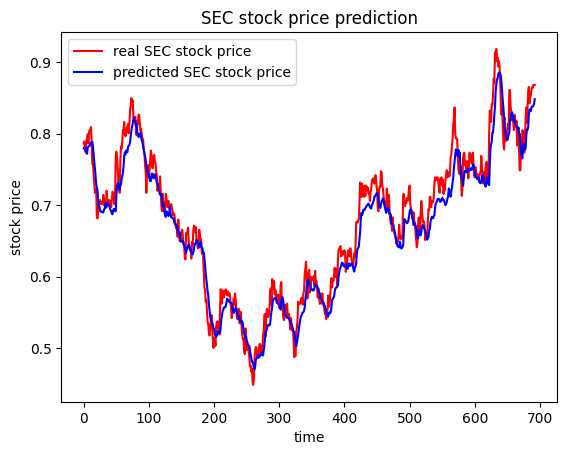

내일 예상되는 삼성전자 주가 : [79916.2414069] KRW


In [ ]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 예상되는 삼성전자 주가 :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')